In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
import os

In [77]:
# Read the csv file into a pandas DataFrame

# crashes = pd.read_csv('/Users/mikeseifer/Desktop/Homework/Project 2/Temp_Traffic_challenge/US_Accidents_June20.csv')
crashes = pd.read_csv('https://data-bootcamp-seifer.s3.us-east-2.amazonaws.com/US_Accidents_June20.csv')
crashes.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [35]:
crashes_df = crashes [["Severity","Temperature(F)","Visibility(mi)","Sunrise_Sunset","Precipitation(in)"]]
crashes_df

,Severity,Temperature(F),Visibility(mi),Sunrise_Sunset,Precipitation(in)
0,3,36.9,10.0,Night,0.02
1,2,37.9,10.0,Night,0.00
2,2,36.0,10.0,Night,NaN
3,3,35.1,9.0,Night,NaN
4,2,36.0,6.0,Day,NaN
...,...,...,...,...,...
3513612,2,86.0,10.0,Day,0.00
3513613,2,70.0,10.0,Day,0.00
3513614,2,73.0,10.0,Day,0.00
3513615,2,71.0,10.0,Day,0.00


In [36]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
crashes_df = pd.get_dummies(crashes_df)
crashes_df.head()
### END SOLUTION

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,3,36.9,10.0,0.02,0,1
1,2,37.9,10.0,0.00,0,1
2,2,36.0,10.0,NaN,0,1
3,3,35.1,9.0,NaN,0,1
4,2,36.0,6.0,NaN,1,0


In [37]:
# Drop extra dummy columns

### BEGIN SOLUTION
crashes_df = crashes_df.drop(columns=['Sunrise_Sunset_Day'])
crashes_df.head()
### END SOLUTION

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Sunrise_Sunset_Night
0,3,36.9,10.0,0.02,1
1,2,37.9,10.0,0.00,1
2,2,36.0,10.0,NaN,1
3,3,35.1,9.0,NaN,1
4,2,36.0,6.0,NaN,0


In [38]:
crashes_df.dropna(inplace = True)
crashes_df.head()

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Sunrise_Sunset_Night
0,3,36.9,10.0,0.02,1
1,2,37.9,10.0,0.00,1
5,3,37.9,7.0,0.03,0
9,3,37.4,3.0,0.02,0
11,3,37.4,3.0,0.02,0


In [39]:
crashes_df.describe()

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Sunrise_Sunset_Night
count,1.472744e+06,1.472744e+06,1.472744e+06,1.472744e+06,1.472744e+06
mean,2.296100e+00,6.129543e+01,8.625674e+00,1.536886e-02,2.607765e-01
std,5.556229e-01,1.814778e+01,3.064662e+00,1.774999e-01,4.390584e-01
min,1.000000e+00,-8.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.000000e+01,9.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,6.300000e+01,1.000000e+01,0.000000e+00,0.000000e+00
75%,3.000000e+00,7.500000e+01,1.000000e+01,0.000000e+00,1.000000e+00
max,4.000000e+00,1.150000e+02,1.050000e+02,2.500000e+01,1.000000e+00


In [57]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = crashes_df[['Temperature(F)', 'Visibility(mi)','Precipitation(in)']]
y = crashes_df["Sunrise_Sunset_Night"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(1472744, 3) (1472744, 1)


In [58]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [59]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [60]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [61]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

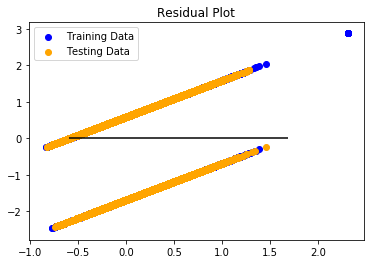

In [62]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [63]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9253623322074254, R2: 0.07572363665066839


In [64]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9256664795911199, R2: 0.07541984620238751


In [65]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9253623322089782, R2: 0.07572363664911719


In [66]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9254681937953381, R2: 0.07561789929775387


In [67]:
target = crashes_df["Severity"]
target_names = ["FB", "Moderate","Severe","Fatal"]

In [69]:
data = crashes_df.drop("Severity", axis=1)
feature_names = data.columns
data.head()

,Temperature(F),Visibility(mi),Precipitation(in),Sunrise_Sunset_Night
0,36.9,10.0,0.02,1
1,37.9,10.0,0.00,1
5,37.9,7.0,0.03,0
9,37.4,3.0,0.02,0
11,37.4,3.0,0.02,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [73]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6971829455764206

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6964115963127332

In [75]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5193134107442657, 'Temperature(F)'),
 (0.2673232719649638, 'Precipitation(in)'),
 (0.19620333511333007, 'Visibility(mi)'),
 (0.017159982177440445, 'Sunrise_Sunset_Night')]